In [16]:
import numpy as np
from skimage.filters import gaussian
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
import pickle
from scipy.spatial import distance_matrix

In [17]:
df = pd.read_csv(r"sample_vids\output_new\0_\_signal_df.csv")

In [24]:
df_all_savinase = pd.read_csv(r"sample_vids\output_new\full_tracked\df.csv")
savinase_locs = df_all_savinase.groupby("particle")[["x", "y"]].mean().to_numpy()

In [25]:
x_y_std = df_all_savinase.groupby("particle")[["x", "y"]].std()
standard_devs = np.sqrt(x_y_std["x"]**2 + x_y_std["y"]**2)

In [26]:
casein_locs = df[~df["particle"].duplicated()][["x", "y"]].to_numpy()

In [27]:
dists = distance_matrix(savinase_locs, casein_locs)

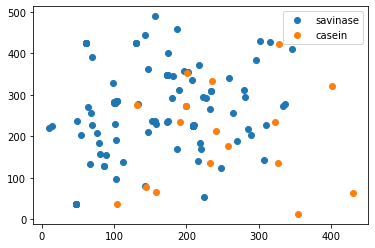

In [37]:
plt.plot(savinase_locs[:, 0], savinase_locs[:, 1], "o", label = "savinase")
plt.plot(casein_locs[:, 0], casein_locs[:, 1], "o", label = "casein")
plt.legend()

In [30]:
closest_caseins = dists.argmin(axis = 1)

In [33]:
(dists[np.arange(len(closest_caseins)), closest_caseins] < 5)

array([False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])